In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [2]:
# apply the graph state
class State(TypedDict):
    name: str
    values: List[int]
    op: str

# intialize the graph
graph = StateGraph(State)

In [3]:
# apply the node action function
def apply_op(state: State) -> State:
    match state['op']:
        case '+':
            state['name'] = f"hello {state['name']} op {state['op']} result {sum(state['values'])}"
        case '*':
            r = 1
            for i in state['values']:
                r *= i
            state['name'] = f"hello {state['name']} op {state['op']} result {r}"
        case _:
            state['name'] = f"hello {state['name']}, unknown op {state['op']}"
    return state

In [4]:
# create a node and set entry and exit points

graph.add_node('calc_processor',apply_op)
graph.set_entry_point('calc_processor')
graph.set_finish_point('calc_processor')

app = graph.compile()

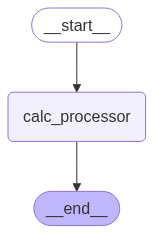

In [6]:
#show graph
from IPython.display import display,Image
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
result = app.invoke({'name':'Ahmed', "values":[1,2,3,4,5], "op":"+"})
print(result)
result = app.invoke({'name':'Ahmed', "values":[1,2,3,4,5], "op":"*"})
print(result)
result = app.invoke({'name':'Ahmed', "values":[1,2,3,4,5], "op":"/"})
print(result)

{'name': 'hello Ahmed op + result 15', 'values': [1, 2, 3, 4, 5], 'op': '+'}
{'name': 'hello Ahmed op * result 120', 'values': [1, 2, 3, 4, 5], 'op': '*'}
{'name': 'hello Ahmed, unknown op /', 'values': [1, 2, 3, 4, 5], 'op': '/'}
